In [84]:
# acess to API
import spotipy.util as util
import requests

# lyrics API
import lyricwikia

# data wrangling and visualisation
import pandas as pd
import matplotlib.pyplot as plt
import pprint as pp
import numpy as np
import seaborn as sns

# plotting
% matplotlib inline

# suppress SettingWithCopyWarning
pd.options.mode.chained_assignment = None  # default='warn'

# Spotify color palette
sns.set_style('white')
colors = ['#1db954', '#535353', '#212121', '#b3b3b3']
sns.set_palette(colors)


### API access

In [238]:
%env SPOTIPY_CLIENT_ID='9d4c252e290b4990ad72adbe32346da0'
%env SPOTIPY_CLIENT_SECRET='c383a7779fed40ed8c87d62705bb89ea'
%env SPOTIPY_REDIRECT_URI='http://localhost:8888/'

env: SPOTIPY_CLIENT_ID='9d4c252e290b4990ad72adbe32346da0'
env: SPOTIPY_CLIENT_SECRET='c383a7779fed40ed8c87d62705bb89ea'
env: SPOTIPY_REDIRECT_URI='http://localhost:8888/'


In [239]:
CLIENT_ID = '9d4c252e290b4990ad72adbe32346da0'
CLIENT_SECRET_KEY = 'c383a7779fed40ed8c87d62705bb89ea'
REDIRECT_URI = 'http://localhost:8888/'
USERNAME = "11161646388"

In [240]:
util.prompt_for_user_token("11161646388",'user-top-read playlist-modify-private playlist-read-private',
                           client_id='9d4c252e290b4990ad72adbe32346da0',
                           client_secret='c383a7779fed40ed8c87d62705bb89ea',
                           redirect_uri='http://localhost:8888/')


'BQDocgUQAOgUdpjAVUNDl3whX0jJCArE8ByJpEOZLvsKcSFgjX_ADWEA2ViFN6kY56WDMJvpYKIHC8FXN8yNdLOqlMS0NMKrvObVfebgH0Laa7gl21MEyGmZ1WRm2CZ38eptrQI4EBkmrhaaUiaMKMNvTtZPW3irLl8BePzF6Myd4DOJHVgQJu1Ltl4_JHWZN3v9zA'

In [241]:
token = util.prompt_for_user_token('11161646388', 'user-top-read playlist-modify-private playlist-read-private')

### Create dataframes with songs that I like

In [134]:
# get id's of my playlists
my_playlists = requests.get('https://api.spotify.com/v1/me/playlists?limit=50',
                      headers={'Authorization': 'Bearer {}'.format(token)})

In [135]:
my_playlists = my_playlists.json()


In [136]:
playlist_ids = []
for pl in my_playlists['items']:
    playlist_ids.append(pl['id'])

In [137]:
my_playlists

{'href': 'https://api.spotify.com/v1/users/11161646388/playlists?offset=0&limit=50',
 'items': [{'collaborative': False,
   'external_urls': {'spotify': 'https://open.spotify.com/playlist/6f6idYVthaOSCOHNB9TZnI'},
   'href': 'https://api.spotify.com/v1/playlists/6f6idYVthaOSCOHNB9TZnI',
   'id': '6f6idYVthaOSCOHNB9TZnI',
   'images': [{'height': 640,
     'url': 'https://mosaic.scdn.co/640/3195137a05c17b3451ba2a14679cf3f8aabe379a5d58ba5cb2dd2535ac6068f2e57702ae247b6a8e69a281db1e17033af48260621b3e495d13a59dd0a1342ada29e2e664d0baa58a1f0dad0c5dbc6e5f',
     'width': 640},
    {'height': 300,
     'url': 'https://mosaic.scdn.co/300/3195137a05c17b3451ba2a14679cf3f8aabe379a5d58ba5cb2dd2535ac6068f2e57702ae247b6a8e69a281db1e17033af48260621b3e495d13a59dd0a1342ada29e2e664d0baa58a1f0dad0c5dbc6e5f',
     'width': 300},
    {'height': 60,
     'url': 'https://mosaic.scdn.co/60/3195137a05c17b3451ba2a14679cf3f8aabe379a5d58ba5cb2dd2535ac6068f2e57702ae247b6a8e69a281db1e17033af48260621b3e495d13a59dd0a13

In [138]:
playlist_tracks = []
for playlist in playlist_ids:
    my_playlists_tracks = requests.get('https://api.spotify.com/v1/playlists/{}/tracks'.format(playlist),
                      headers={'Authorization': 'Bearer {}'.format(token)})
    for song in my_playlists_tracks.json()['items']:
        playlist_tracks.append(song['track']['id'])

In [139]:
len(playlist_tracks) / 50

27.1

In [140]:
songs = []
index = 0
for x in range(26):
    query_ids = playlist_tracks[index:index+50]
    string_ids = ','.join(x for x in query_ids)
    songs_json = requests.get('https://api.spotify.com/v1/tracks/?ids={}'.format(string_ids),
                      headers={'Authorization': 'Bearer {}'.format(token)}).json()
    for y in range(len(songs_json['tracks'])):
        song_title = songs_json['tracks'][y]['name']
        song_id = songs_json['tracks'][y]['id']
        song_duration = songs_json['tracks'][y]['duration_ms']
        song_popularity = songs_json['tracks'][y]['popularity']
        song_explicit = songs_json['tracks'][y]['explicit']
        song_available_markets = songs_json['tracks'][y]['available_markets']
        artists = []
        artists_ids = []
        for z in range(len(songs_json['tracks'][y]['artists'])):
            artists.append(songs_json['tracks'][y]['artists'][z]['name'])
            artists_ids.append(songs_json['tracks'][y]['artists'][z]['id'])
        song_info = (song_title, song_id, song_duration, song_popularity, artists, artists_ids)
        songs.append(song_info)
    index += 50

In [141]:
my_songs = pd.DataFrame(songs)

In [142]:
my_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 6 columns):
0    1300 non-null object
1    1300 non-null object
2    1300 non-null int64
3    1300 non-null int64
4    1300 non-null object
5    1300 non-null object
dtypes: int64(2), object(4)
memory usage: 61.0+ KB


In [143]:
my_songs.columns = ['song', 'song_id', 'duration', 'popularity', 'artist', 'artist_id']

In [153]:
my_songs.head()

,song,song_id,duration,popularity,artist,artist_id
0,Bermudachords,1Hku0r6JBdATTjLfL4gCZ2,469200,32,[Andhim],[6XJeFzmI6vrWyHcdB7EImP]
1,Moc energia,2CdHgWd7uKWZD32eR4dukp,276410,29,[DJ Trakmajster],[4FDUlEAYU58WOUULJtx9l8]
2,Papierowy man,71bH5zeAg36gxxEYayfSmp,197500,32,[RAU],[1xCv6hHBPi9VlLay5bqdVb]
3,Trebles (Mix Edit),5Y90cxY9a7tdqPCdjaS33B,252199,37,[MBrother],[0ezCMQkF2T041b8HA3pnwQ]
4,Broken,74371qe3JITue5M1q3NhrN,249026,30,[K Dinero],[2pTsUSxtCYHSUqYLT3jIFs]


In [149]:
len(my_songs.song_id.unique())

1122

In [155]:
my_songs.drop_duplicates(subset='song_id', inplace=True)

In [156]:
my_songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1122 entries, 0 to 1299
Data columns (total 6 columns):
song          1122 non-null object
song_id       1122 non-null object
duration      1122 non-null int64
popularity    1122 non-null int64
artist        1122 non-null object
artist_id     1122 non-null object
dtypes: int64(2), object(4)
memory usage: 61.4+ KB


## Get "random" songs 

In [19]:
random_strings = ['%25a%25', 'a%25', '%25a'] 
random_strings2 = ['%25e%25', 'e%25', '%25e']
random_strings3 = ['%25i%25','i%25', '%25i']
random_strings4 = ['o%25', '%25o', '%25u%25']
random_strings5 = ['u%25', '%25u', '%25o%25']

In [20]:
search_results = []
offset = 0
for string in random_strings:
    for x in range(66):
        search_songs = requests.get('https://api.spotify.com/v1/search?q={}&type=track&limit=50&offset={}'\
                                    .format(string, offset),
                              headers={'Authorization': 'Bearer {}'.format(token)}).json()
        for y in range(len(search_songs['tracks']['items'])):
            song_title = search_songs['tracks']['items'][y]['name']
            song_id = search_songs['tracks']['items'][y]['id']
            song_duration = search_songs['tracks']['items'][y]['duration_ms']
            song_popularity = search_songs['tracks']['items'][y]['popularity']
            song_explicit = search_songs['tracks']['items'][y]['explicit']
            song_available_markets = search_songs['tracks']['items'][y]['available_markets']
            artists = []
            artists_ids = []
            for z in range(len(search_songs['tracks']['items'][y]['artists'])):
                artists.append(search_songs['tracks']['items'][y]['artists'][z]['name'])
                artists_ids.append(search_songs['tracks']['items'][y]['artists'][z]['id'])
            song_info = (song_title, song_id, song_duration, song_popularity, artists, artists_ids)
            search_results.append(song_info)
        offset += 50

In [21]:
len(search_results)

9900

In [22]:
offset = 0
for string in random_strings2:
    for x in range(66):
        search_songs = requests.get('https://api.spotify.com/v1/search?q={}&type=track&limit=50&offset={}'\
                                    .format(string, offset),
                              headers={'Authorization': 'Bearer {}'.format(token)}).json()
        for y in range(len(search_songs['tracks']['items'])):
            song_title = search_songs['tracks']['items'][y]['name']
            song_id = search_songs['tracks']['items'][y]['id']
            song_duration = search_songs['tracks']['items'][y]['duration_ms']
            song_popularity = search_songs['tracks']['items'][y]['popularity']
            song_explicit = search_songs['tracks']['items'][y]['explicit']
            song_available_markets = search_songs['tracks']['items'][y]['available_markets']
            artists = []
            artists_ids = []
            for z in range(len(search_songs['tracks']['items'][y]['artists'])):
                artists.append(search_songs['tracks']['items'][y]['artists'][z]['name'])
                artists_ids.append(search_songs['tracks']['items'][y]['artists'][z]['id'])
            song_info = (song_title, song_id, song_duration, song_popularity, artists, artists_ids)
            search_results.append(song_info)
        offset += 50

In [23]:
len(search_results)

19800

In [24]:
offset = 0
for string in random_strings3:
    for x in range(66):
        search_songs = requests.get('https://api.spotify.com/v1/search?q={}&type=track&limit=50&offset={}'\
                                    .format(string, offset),
                              headers={'Authorization': 'Bearer {}'.format(token)}).json()
        for y in range(len(search_songs['tracks']['items'])):
            song_title = search_songs['tracks']['items'][y]['name']
            song_id = search_songs['tracks']['items'][y]['id']
            song_duration = search_songs['tracks']['items'][y]['duration_ms']
            song_popularity = search_songs['tracks']['items'][y]['popularity']
            artists = []
            artists_ids = []
            for z in range(len(search_songs['tracks']['items'][y]['artists'])):
                artists.append(search_songs['tracks']['items'][y]['artists'][z]['name'])
                artists_ids.append(search_songs['tracks']['items'][y]['artists'][z]['id'])
            song_info = (song_title, song_id, song_duration, song_popularity, artists, artists_ids)
            search_results.append(song_info)
        offset += 50

In [25]:
len(search_results)

29700

In [27]:
offset = 0
for string in random_strings4:
    for x in range(66):
        search_songs = requests.get('https://api.spotify.com/v1/search?q={}&type=track&limit=50&offset={}'\
                                    .format(string, offset),
                              headers={'Authorization': 'Bearer {}'.format(token)}).json()
        for y in range(len(search_songs['tracks']['items'])):
            song_title = search_songs['tracks']['items'][y]['name']
            song_id = search_songs['tracks']['items'][y]['id']
            song_duration = search_songs['tracks']['items'][y]['duration_ms']
            song_popularity = search_songs['tracks']['items'][y]['popularity']
            artists = []
            artists_ids = []
            for z in range(len(search_songs['tracks']['items'][y]['artists'])):
                artists.append(search_songs['tracks']['items'][y]['artists'][z]['name'])
                artists_ids.append(search_songs['tracks']['items'][y]['artists'][z]['id'])
            song_info = (song_title, song_id, song_duration, song_popularity, artists, artists_ids)
            search_results.append(song_info)
        offset += 50

In [28]:
len(search_results)

40750

In [29]:
offset = 0
for string in random_strings5:
    for x in range(66):
        search_songs = requests.get('https://api.spotify.com/v1/search?q={}&type=track&limit=50&offset={}'\
                                    .format(string, offset),
                              headers={'Authorization': 'Bearer {}'.format(token)}).json()
        for y in range(len(search_songs['tracks']['items'])):
            song_title = search_songs['tracks']['items'][y]['name']
            song_id = search_songs['tracks']['items'][y]['id']
            song_duration = search_songs['tracks']['items'][y]['duration_ms']
            song_popularity = search_songs['tracks']['items'][y]['popularity']
            
            artists = []
            artists_ids = []
            for z in range(len(search_songs['tracks']['items'][y]['artists'])):
                artists.append(search_songs['tracks']['items'][y]['artists'][z]['name'])
                artists_ids.append(search_songs['tracks']['items'][y]['artists'][z]['id'])
            song_info = (song_title, song_id, song_duration, song_popularity, artists, artists_ids)
            search_results.append(song_info)
        offset += 50

In [30]:
len(search_results)

50650

In [77]:
search_results = pd.DataFrame(search_results)

In [78]:
search_results.to_csv('search_results.csv')

In [242]:
search_results = pd.read_csv('search_results.csv')

In [243]:
search_results.head()

,Unnamed: 0,0,1,2,3,4,5
0,0,Nothing Breaks Like a Heart (feat. Miley Cyrus),27rdGxbavYJeBphck5MZAF,217466,90,"['Mark Ronson', 'Miley Cyrus']","['3hv9jJF3adDNsBSIQDqcjp', '5YGY8feqx7naU7z4Hr..."
1,1,It's Beginning To Look A Lot Like Christmas,5a1iz510sv2W9Dt1MvFd5R,206346,92,['Michael Bublé'],['1GxkXlMwML1oSg5eLPiAz3']
2,2,Santa Baby,0cM5URUqqQTpJWonmdzF1J,202546,83,['Kylie Minogue'],['4RVnAU35WRWra6OZ3CbbMA']
3,3,Shallow - Radio Edit,6QfS2wq5sSC1xAJCQsTSlj,217212,86,"['Lady Gaga', 'Bradley Cooper']","['1HY2Jd0NmPuamShAr6KMms', '4VIvfOurcf0vuLRxLk..."
4,4,Sleigh Ride,5ASM6Qjiav2xPe7gRkQMsQ,181266,87,['The Ronettes'],['7CyeXFnOrfC1N6z4naIpgo']


In [245]:
search_results.columns = ['0', 'song', 'song_id', 'duration', 'popularity', 'artist', 'artist_id']

## Adding audio features

In [163]:
# get audio features for my songs
offset = 0
my_songs_features = []
for i in range(13):
    song_ids = my_songs.loc[offset: offset+99]['song_id'].values
    string_ids = ','.join(x for x in song_ids)
    audio_features = requests.get('https://api.spotify.com/v1/audio-features/?ids={}'\
                                  .format(string_ids),
                              headers={'Authorization': 'Bearer {}'.format(token)}).json()
    for x in range(len(audio_features['audio_features'])):
        s_id = audio_features['audio_features'][x]['id']
        acousticness = audio_features['audio_features'][x]['acousticness']
        danceability = audio_features['audio_features'][x]['danceability']
        energy = audio_features['audio_features'][x]['energy']
        instrumentalness = audio_features['audio_features'][x]['instrumentalness']
        liveness = audio_features['audio_features'][x]['liveness']
        loudness = audio_features['audio_features'][x]['loudness']
        speechiness = audio_features['audio_features'][x]['speechiness']
        tempo = audio_features['audio_features'][x]['tempo']
        valence = audio_features['audio_features'][x]['valence']
        song_features = (s_id, acousticness, danceability, energy, instrumentalness, liveness, loudness,
                        speechiness, tempo, valence)
        my_songs_features.append(song_features)
    offset += 100

In [164]:
my_songs_features = pd.DataFrame(my_songs_features)

In [165]:
my_songs_features.columns = ['song_id', 'acousticness', 'danceability' , 'energy', 'instrumentalness', 'liveness', 'loudness', 
                    'speechiness', 'tempo', 'valence']

In [166]:
my_songs = my_songs.join(my_songs_features, rsuffix='_f')

In [167]:
my_songs

,song,song_id,duration,popularity,artist,artist_id,song_id_f,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Bermudachords,1Hku0r6JBdATTjLfL4gCZ2,469200,32,[Andhim],[6XJeFzmI6vrWyHcdB7EImP],1Hku0r6JBdATTjLfL4gCZ2,0.029000,0.960,0.499,0.948000,0.1210,-7.483,0.0565,124.003,0.365
1,Moc energia,2CdHgWd7uKWZD32eR4dukp,276410,29,[DJ Trakmajster],[4FDUlEAYU58WOUULJtx9l8],2CdHgWd7uKWZD32eR4dukp,0.012100,0.900,0.756,0.000000,0.5340,-7.571,0.1980,127.981,0.642
2,Papierowy man,71bH5zeAg36gxxEYayfSmp,197500,32,[RAU],[1xCv6hHBPi9VlLay5bqdVb],71bH5zeAg36gxxEYayfSmp,0.136000,0.931,0.508,0.000537,0.1100,-8.883,0.0671,96.016,0.747
3,Trebles (Mix Edit),5Y90cxY9a7tdqPCdjaS33B,252199,37,[MBrother],[0ezCMQkF2T041b8HA3pnwQ],5Y90cxY9a7tdqPCdjaS33B,0.000147,0.898,0.498,0.868000,0.1290,-5.781,0.0956,135.989,0.936
4,Broken,74371qe3JITue5M1q3NhrN,249026,30,[K Dinero],[2pTsUSxtCYHSUqYLT3jIFs],74371qe3JITue5M1q3NhrN,0.025900,0.593,0.623,0.000033,0.1360,-11.832,0.1440,91.033,0.401
5,Africa,2374M0fQpWi3dLnB54qaLX,295893,83,[Toto],[0PFtn5NtBbbUNbU9EAmIWF],2374M0fQpWi3dLnB54qaLX,0.257000,0.671,0.373,0.000079,0.0481,-18.064,0.0323,92.717,0.732
6,Scatman (ski-ba-bop-ba-dop-bop),623rRTKwGmgjH6sjE9uWLh,215973,65,[Scatman John],[4omQQTNN7ILiMsSB2k9eqX],623rRTKwGmgjH6sjE9uWLh,0.065500,0.650,0.820,0.002740,0.2150,-10.900,0.0356,135.982,0.757
7,"Relax, Take It Easy",71zY1dyR356wGSEvZPgmaV,270000,49,[MIKA],[5MmVJVhhYKQ86izuGHzJYA],71zY1dyR356wGSEvZPgmaV,0.058000,0.694,0.694,0.012600,0.1290,-8.210,0.0328,121.876,0.608
8,Material Girl,22sLuJYcvZOSoLLRYev1s5,240280,70,[Madonna],[6tbjWDEIzxoDsBA1FuhfPW],22sLuJYcvZOSoLLRYev1s5,0.333000,0.742,0.883,0.000008,0.0964,-3.419,0.0329,136.506,0.978
9,"Dzień dobry, kocham Cię",6FBPQuYFZIne5cpTASUOGR,201733,47,[Strachy Na Lachy],[4DXXg7xzgKAEYeFhh9wAtk],6FBPQuYFZIne5cpTASUOGR,0.240000,0.664,0.733,0.000000,0.3790,-6.745,0.0593,136.097,0.816


In [246]:
# get audio features for all songs
offset = 0
all_songs_features = []
for i in range(51):
    song_ids = search_results.loc[offset: offset+99]['song_id'].values
    string_ids = ','.join(x for x in song_ids)
    audio_features = requests.get('https://api.spotify.com/v1/audio-features/?ids={}'\
                                  .format(string_ids),
                              headers={'Authorization': 'Bearer {}'.format(token)}).json()
    for x in range(len(audio_features['audio_features'])):
        s_id = audio_features['audio_features'][x]['id']
        acousticness = audio_features['audio_features'][x]['acousticness']
        danceability = audio_features['audio_features'][x]['danceability']
        energy = audio_features['audio_features'][x]['energy']
        instrumentalness = audio_features['audio_features'][x]['instrumentalness']
        liveness = audio_features['audio_features'][x]['liveness']
        loudness = audio_features['audio_features'][x]['loudness']
        speechiness = audio_features['audio_features'][x]['speechiness']
        tempo = audio_features['audio_features'][x]['tempo']
        valence = audio_features['audio_features'][x]['valence']
        song_features = (s_id, acousticness, danceability, energy, instrumentalness, liveness, loudness,
                        speechiness, tempo, valence)
        all_songs_features.append(song_features)
    offset += 100

In [247]:
all_songs_features = pd.DataFrame(all_songs_features)

In [249]:
all_songs_features.columns = ['song_id', 'acousticness', 'danceability' , 'energy', 'instrumentalness', 'liveness', 'loudness', 
                    'speechiness', 'tempo', 'valence']

In [250]:
search_results = search_results.join(all_songs_features, rsuffix='_f')

In [252]:
search_results.head()

,0,song,song_id,duration,popularity,artist,artist_id,song_id_f,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0,Nothing Breaks Like a Heart (feat. Miley Cyrus),27rdGxbavYJeBphck5MZAF,217466,90,"['Mark Ronson', 'Miley Cyrus']","['3hv9jJF3adDNsBSIQDqcjp', '5YGY8feqx7naU7z4Hr...",27rdGxbavYJeBphck5MZAF,0.00987,0.601,0.794,0.000001,0.3880,-5.844,0.0671,114.066,0.244
1,1,It's Beginning To Look A Lot Like Christmas,5a1iz510sv2W9Dt1MvFd5R,206346,92,['Michael Bublé'],['1GxkXlMwML1oSg5eLPiAz3'],5a1iz510sv2W9Dt1MvFd5R,0.90700,0.350,0.232,0.000009,0.2920,-11.042,0.0331,93.269,0.381
2,2,Santa Baby,0cM5URUqqQTpJWonmdzF1J,202546,83,['Kylie Minogue'],['4RVnAU35WRWra6OZ3CbbMA'],0cM5URUqqQTpJWonmdzF1J,0.74400,0.685,0.391,0.000000,0.1420,-7.183,0.0435,87.101,0.443
3,3,Shallow - Radio Edit,6QfS2wq5sSC1xAJCQsTSlj,217212,86,"['Lady Gaga', 'Bradley Cooper']","['1HY2Jd0NmPuamShAr6KMms', '4VIvfOurcf0vuLRxLk...",6QfS2wq5sSC1xAJCQsTSlj,0.41600,0.575,0.330,0.000000,0.0872,-6.557,0.0310,95.801,0.277
4,4,Sleigh Ride,5ASM6Qjiav2xPe7gRkQMsQ,181266,87,['The Ronettes'],['7CyeXFnOrfC1N6z4naIpgo'],5ASM6Qjiav2xPe7gRkQMsQ,0.40300,0.528,0.772,0.000003,0.3160,-7.013,0.0288,91.735,0.852


### Extract list of artists into separate columns

In [168]:
a_list = my_songs['artist'].apply(pd.Series)
# id_list = my_songs['artist_id'].apply(pd.Series)

In [169]:
my_songs = pd.concat([my_songs, a_list], axis=1)

In [170]:
my_songs.to_csv('my_songs.csv')

In [171]:
my_songs = pd.read_csv('my_songs.csv')

In [172]:
my_songs.head()

,Unnamed: 0,song,song_id,duration,popularity,artist,artist_id,song_id_f,acousticness,danceability,...,speechiness,tempo,valence,0,1,2,3,4,5,6
0,0,Bermudachords,1Hku0r6JBdATTjLfL4gCZ2,469200,32,['Andhim'],['6XJeFzmI6vrWyHcdB7EImP'],1Hku0r6JBdATTjLfL4gCZ2,0.029000,0.960,...,0.0565,124.003,0.365,Andhim,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Moc energia,2CdHgWd7uKWZD32eR4dukp,276410,29,['DJ Trakmajster'],['4FDUlEAYU58WOUULJtx9l8'],2CdHgWd7uKWZD32eR4dukp,0.012100,0.900,...,0.1980,127.981,0.642,DJ Trakmajster,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Papierowy man,71bH5zeAg36gxxEYayfSmp,197500,32,['RAU'],['1xCv6hHBPi9VlLay5bqdVb'],71bH5zeAg36gxxEYayfSmp,0.136000,0.931,...,0.0671,96.016,0.747,RAU,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Trebles (Mix Edit),5Y90cxY9a7tdqPCdjaS33B,252199,37,['MBrother'],['0ezCMQkF2T041b8HA3pnwQ'],5Y90cxY9a7tdqPCdjaS33B,0.000147,0.898,...,0.0956,135.989,0.936,MBrother,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Broken,74371qe3JITue5M1q3NhrN,249026,30,['K Dinero'],['2pTsUSxtCYHSUqYLT3jIFs'],74371qe3JITue5M1q3NhrN,0.025900,0.593,...,0.1440,91.033,0.401,K Dinero,NaN,NaN,NaN,NaN,NaN,NaN


### Getting song id's for the songs I don't like

In [173]:
songs_neg = []
songs_neg_req = requests.get('https://api.spotify.com/v1/playlists/6f6idYVthaOSCOHNB9TZnI/tracks',
                              headers={'Authorization': 'Bearer {}'.format(token)}).json()
for x in range(len(songs_neg_req['items'])):
    songs_neg.append(songs_neg_req['items'][x]['track']['id'])

In [174]:
songs_neg[:2]

['1Hku0r6JBdATTjLfL4gCZ2', '2CdHgWd7uKWZD32eR4dukp']

## Clean song titles to get lyrics

In [175]:
my_songs.head()

,Unnamed: 0,song,song_id,duration,popularity,artist,artist_id,song_id_f,acousticness,danceability,...,speechiness,tempo,valence,0,1,2,3,4,5,6
0,0,Bermudachords,1Hku0r6JBdATTjLfL4gCZ2,469200,32,['Andhim'],['6XJeFzmI6vrWyHcdB7EImP'],1Hku0r6JBdATTjLfL4gCZ2,0.029000,0.960,...,0.0565,124.003,0.365,Andhim,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Moc energia,2CdHgWd7uKWZD32eR4dukp,276410,29,['DJ Trakmajster'],['4FDUlEAYU58WOUULJtx9l8'],2CdHgWd7uKWZD32eR4dukp,0.012100,0.900,...,0.1980,127.981,0.642,DJ Trakmajster,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Papierowy man,71bH5zeAg36gxxEYayfSmp,197500,32,['RAU'],['1xCv6hHBPi9VlLay5bqdVb'],71bH5zeAg36gxxEYayfSmp,0.136000,0.931,...,0.0671,96.016,0.747,RAU,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Trebles (Mix Edit),5Y90cxY9a7tdqPCdjaS33B,252199,37,['MBrother'],['0ezCMQkF2T041b8HA3pnwQ'],5Y90cxY9a7tdqPCdjaS33B,0.000147,0.898,...,0.0956,135.989,0.936,MBrother,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Broken,74371qe3JITue5M1q3NhrN,249026,30,['K Dinero'],['2pTsUSxtCYHSUqYLT3jIFs'],74371qe3JITue5M1q3NhrN,0.025900,0.593,...,0.1440,91.033,0.401,K Dinero,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
my_songs['song'] = [x.split(' -')[0] if ' -' in x else x for x in my_songs['song']]

In [177]:
my_songs['song'] = [x.split(' (')[0] if ' (' in x else x for x in my_songs['song']]

In [178]:
my_songs['duration'] = my_songs['duration'] / 1000 / 60

In [179]:
my_songs['target'] = np.where(my_songs['song_id'].isin(songs_neg), 0, 1)

In [180]:
liked_by_me = my_songs[~my_songs['song_id'].isin(songs_neg)]

In [17]:
all_lyrics = ''
i = 0
for x in liked_by_me.index:
    song = liked_by_me.loc[x]['song']
    artist = liked_by_me.loc[x]['0']
    try:
        all_lyrics += lyricwikia.get_lyrics(artist, song, linesep=' ')
        i += 1
    except:
        pass

In [18]:
i

487

In [19]:
with open("all_lyrics.txt", "w") as text_file:
    text_file.write(all_lyrics)

## Exploratory analysis on songs that I like and don't like

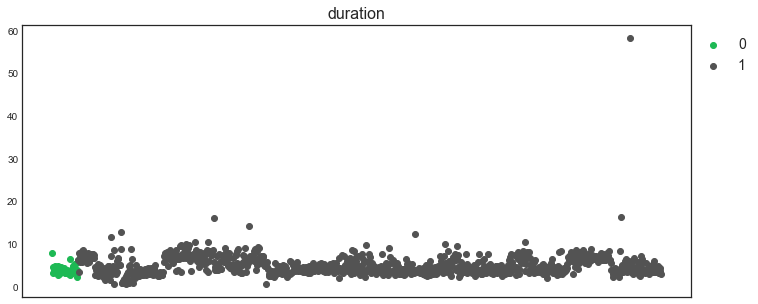

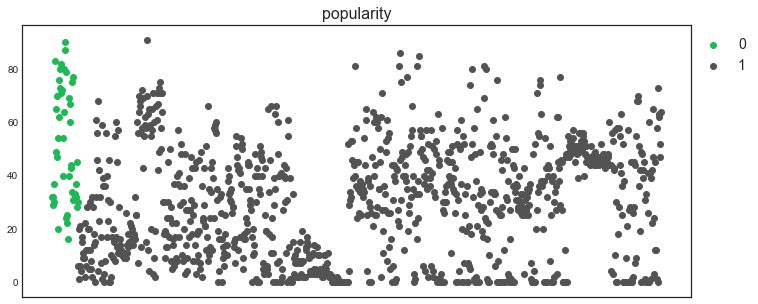

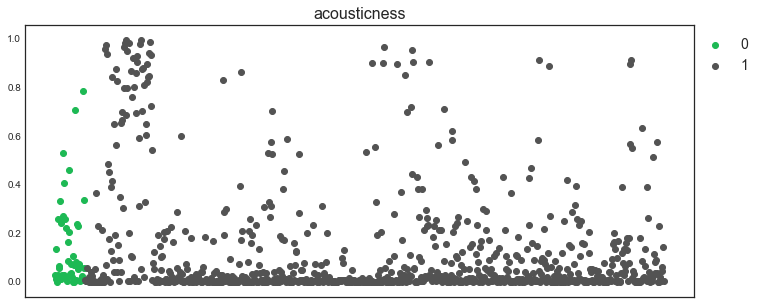

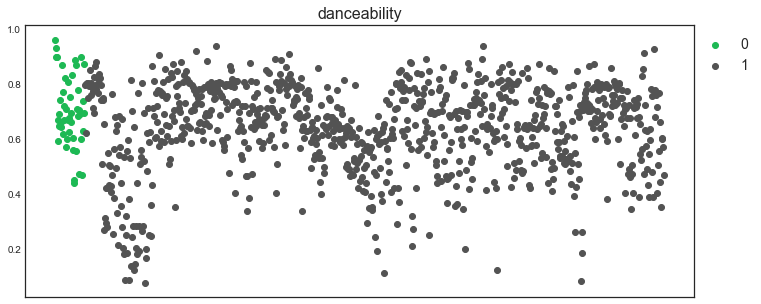

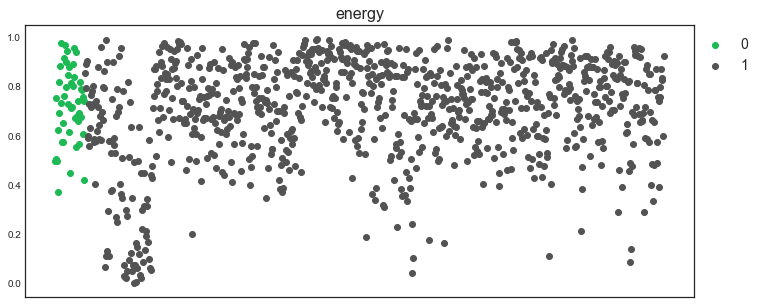

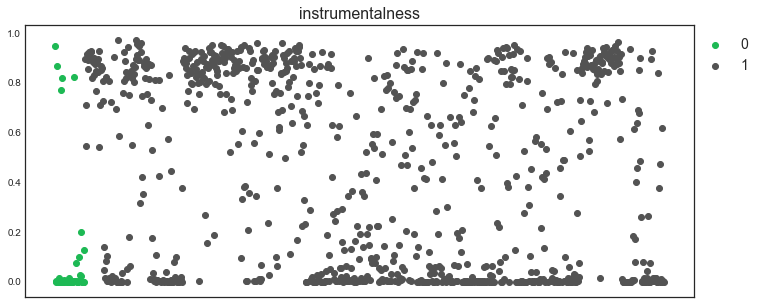

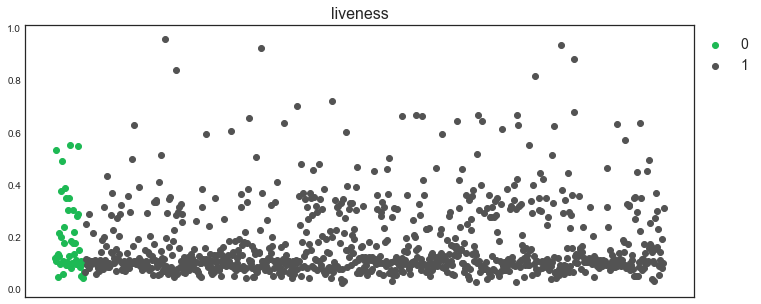

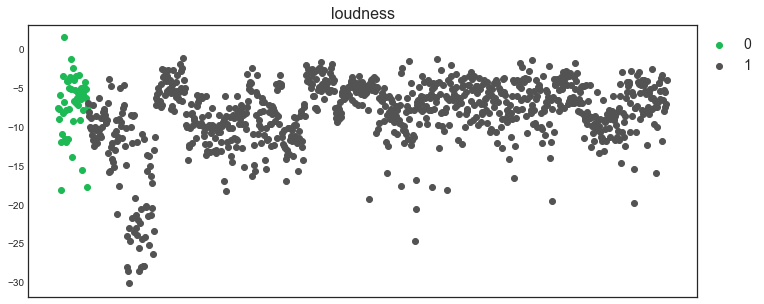

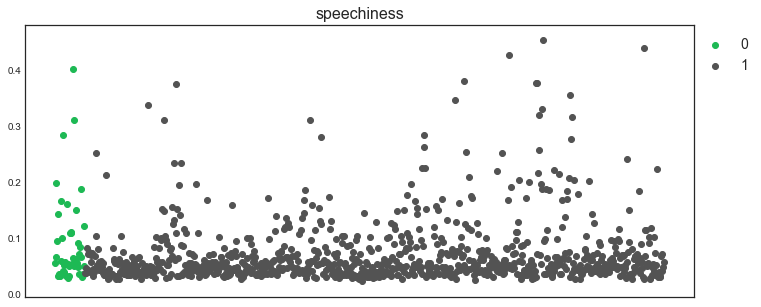

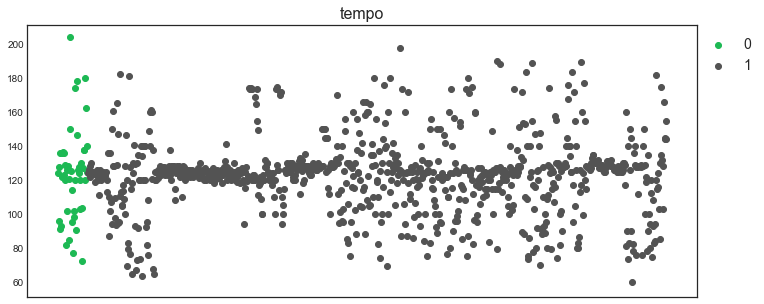

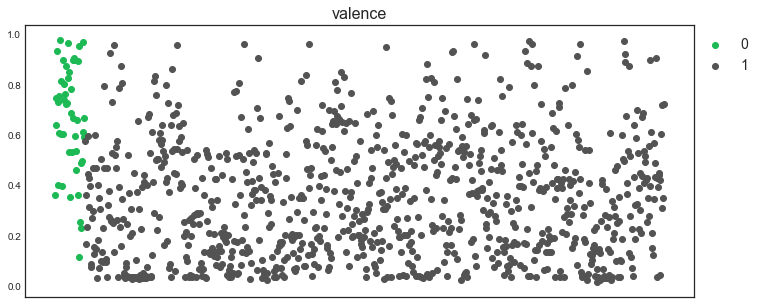

In [228]:
for col in ['duration', 'popularity', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']:
    fig, ax = plt.subplots(figsize=(12, 5))
    for value in my_songs['target'].unique():
        df_plot = my_songs[my_songs['target'] == value]
        plt.scatter(y=df_plot[col], x=df_plot.index, label=value);
    plt.title(s=col, fontsize=16)
    plt.legend(bbox_to_anchor=(1.1, 1), fontsize=14)
    plt.xticks([]);

In [183]:
my_songs[my_songs['duration'] == my_songs['duration'].max()]

,Unnamed: 0,song,song_id,duration,popularity,artist,artist_id,song_id_f,acousticness,danceability,...,tempo,valence,0,1,2,3,4,5,6,target
1065,1219,We Are Virtual,4AOBmauiCdpBtb2LIDdN1H,58.44285,0,['Xilent'],['1k78cRCnTM3T7EhvhVeaKX'],NaN,NaN,NaN,...,NaN,NaN,Xilent,NaN,NaN,NaN,NaN,NaN,NaN,1


In [184]:
my_songs[my_songs['duration'] == my_songs['duration'].min()]

,Unnamed: 0,song,song_id,duration,popularity,artist,artist_id,song_id_f,acousticness,danceability,...,tempo,valence,0,1,2,3,4,5,6,target
393,395,Revolution,48ykuYzKJnmmoZmERthAYs,0.622,19,['Bjarki'],['6FtSCON62H1CEJtN39y9yI'],2D7d0ougBVpEN6YySlrnw7,0.00374,0.822,...,117.99,0.365,Bjarki,NaN,NaN,NaN,NaN,NaN,NaN,1


In [186]:
my_songs[my_songs['popularity'] == my_songs['popularity'].min()]

,Unnamed: 0,song,song_id,duration,popularity,artist,artist_id,song_id_f,acousticness,danceability,...,tempo,valence,0,1,2,3,4,5,6,target
79,79,We Love You,1Bnnk0CEiQ6KlrORil9uQ8,4.616000,0,['The Rolling Stones'],['22bE4uQ6baNwSHPVcDxLCe'],1Bnnk0CEiQ6KlrORil9uQ8,0.003830,0.270,...,113.233,0.4710,The Rolling Stones,NaN,NaN,NaN,NaN,NaN,NaN,1
96,96,Pauvre Lola,2lrug8FKQw8fPuhdYp4TAN,2.500000,0,['Serge Gainsbourg'],['01C9OoXDvCKkGcf735Tcfo'],2lrug8FKQw8fPuhdYp4TAN,0.192000,0.681,...,94.644,0.5230,Serge Gainsbourg,NaN,NaN,NaN,NaN,NaN,NaN,1
104,104,Undiscovered First,4WKmQkTCJl9pA6CDRNXitD,4.976217,0,['Feist'],['6CWTBjOJK75cTE8Xv8u1kj'],4WKmQkTCJl9pA6CDRNXitD,0.349000,0.572,...,113.350,0.2350,Feist,NaN,NaN,NaN,NaN,NaN,NaN,1
107,107,Swinging On A Star,4dJj1PWYOVCtqw6orauCJw,2.894883,0,['Frank Sinatra'],['1Mxqyy3pSjf8kZZL4QVxS0'],4dJj1PWYOVCtqw6orauCJw,0.696000,0.676,...,128.131,0.8090,Frank Sinatra,NaN,NaN,NaN,NaN,NaN,NaN,1
305,307,Gift,0cxt2MlkqUAfMBHBNKFF4e,4.033917,0,['Helena Hauff'],['1JcefSOP7bcWEluL0iEIaN'],4b3dQlcSgg2YNhGz7tDF76,0.000151,0.793,...,122.310,0.4560,Helena Hauff,NaN,NaN,NaN,NaN,NaN,NaN,1
312,314,One Of These Days,0s27p0DkobUiRG6LaUMfw6,5.979083,0,"['Fred V', 'Grafix']","['0k3dnuEr9LghUE4jxS0PT4', '27YdXZOMLqvxI2pB5G...",1IRlNMNswiIy9BEspPijvW,0.257000,0.879,...,123.004,0.0315,Fred V,Grafix,NaN,NaN,NaN,NaN,NaN,1
367,369,Distante,0u7l96HgqYzpiWVxICJN96,6.768733,0,"['Tale Of Us', 'Woo York']","['1UL813H5aj3e8ekE5RqWqc', '3F4cmqlG4wCV3aEZlH...",6KLCvBLOxz2Oob3vNty1s5,0.173000,0.657,...,129.989,0.1060,Tale Of Us,Woo York,NaN,NaN,NaN,NaN,NaN,1
377,379,Frozen City,2YV2na38fOgFmyY4FmRAXK,5.153333,0,['Ben Klock'],['1vJHfCreWAS46V8RZ67ojo'],6IvIOCUhUXNBBLainiXCeK,0.000015,0.801,...,121.996,0.1960,Ben Klock,NaN,NaN,NaN,NaN,NaN,NaN,1
381,383,Womb,1lJIfddejvSae0G7vHwPHQ,9.177017,0,['Adriatique'],['02DWGcShQivFepRvGJ7xhB'],5UsfWcP6SThHlZ4oAgx7ge,0.037500,0.725,...,128.006,0.1340,Adriatique,NaN,NaN,NaN,NaN,NaN,NaN,1
406,408,Invisible,4P48cDy7zlenE6bpi5T26X,3.210000,0,['Merk & Kremont'],['5rRcnWrevHgbuWjl7Lhft7'],1u9Carn33Xx6wN2BGHWseY,0.002320,0.747,...,125.997,0.9640,Merk & Kremont,NaN,NaN,NaN,NaN,NaN,NaN,1


In [187]:
my_songs[my_songs['popularity'] == my_songs['popularity'].max()]

,Unnamed: 0,song,song_id,duration,popularity,artist,artist_id,song_id_f,acousticness,danceability,...,tempo,valence,0,1,2,3,4,5,6,target
175,175,In My Mind,0E9ZjEAyAwOXZ7wJC0PD33,3.076,91,"['Dynoro', ""Gigi D'Agostino""]","['3v6Ji4uoWtKRkhuDUaxi9n', '1OAjDaKgg00KCUYqDe...",0E9ZjEAyAwOXZ7wJC0PD33,0.176,0.694,...,125.905,0.163,Dynoro,Gigi D'Agostino,NaN,NaN,NaN,NaN,NaN,1
